In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(rc={"figure.figsize":(16, 8)}) #width=3, #height=4
import matplotlib.pyplot as plt
import os

# 1. Loading data

## 1.1 Raw data

In [3]:
dataDir = "./experiments0.1envVar"
expDirs = !ls {dataDir}

columns = ['Experiment','Task','Seed','Noise per steps','Trial','Reward','steps_taken']
data = pd.DataFrame(columns=columns)

for expDir in expDirs:
    tmp = expDir.split("_")
    exp = tmp[1]
    task = tmp[0] 
       
    for i in range(1,11):
            try:
                data_seed = pd.read_csv(os.path.join(dataDir,expDir,f'robustness_bestgS{i}.npy.csv'))
                data_seed.loc[:,'Experiment'] = exp
                data_seed.loc[:,'Task'] = task
                data_seed.loc[:,'Seed'] = i
                data_seed.loc[:,'Noise per steps'] = data_seed['noise_level'].astype('str')+' - '+data_seed['corr_n_steps'].astype('str')
                data = data.append(data_seed)
            except:
                print(f'Data from {os.path.join(exp,task,f"robustness_bestgS{i}.npy.csv")} couldn\'t be loaded. Skipping.')

data.drop('Unnamed: 0',axis=1,inplace=True)
expList = data['Experiment'].unique()
taskList = data['Task'].unique()
noiseLevelList = data['noise_level'].unique()
noiseStepsList = data['corr_n_steps'].unique()

## 1.2 Creating a pivot table that aggregates (avg) the trials

In [4]:
## Creating a pivot_table and an aggregated (data_plot) version of the df
table_data = pd.pivot_table(data,values=['Reward','steps_taken'],index=['Experiment','Task','noise_level','corr_n_steps','Seed'],aggfunc=np.mean)
data_plot = pd.DataFrame()
for exp in expList:
    for task in taskList:
        for noise in noiseLevelList:
            try:
                table_data.loc[exp, task]
            except:
                print(f"Pivot table loading. Experiment {exp}/{task} doesn't exist. Skipping.")
            else:
                for steps in noiseStepsList:
                    #exp2 = exp
                    #task2 = task
                    #if exp == 'robustnessTest':
                    #    tmp = task.split("_")
                    #    exp2 = tmp[0]
                    #    task2 = tmp[1]
                    data_tmp = table_data.loc[exp, task, noise,steps].copy()
                    data_tmp['Experiment'] = exp
                    data_tmp['Task'] = task
                    data_tmp['noise_level'] = noise        
                    data_tmp['noise_steps'] = steps
                    data_tmp['Noise per steps'] = f"{noise} - {steps}"
                    data_plot = data_plot.append(data_tmp)
data_plot.shape

Pivot table loading. Experiment 2trials/xhumanoid doesn't exist. Skipping.
Pivot table loading. Experiment 2trials/xhumanoid doesn't exist. Skipping.
Pivot table loading. Experiment 2trials/xhumanoid doesn't exist. Skipping.
Pivot table loading. Experiment 2trials/xhumanoid doesn't exist. Skipping.
Pivot table loading. Experiment 2trials/xhumanoid doesn't exist. Skipping.
Pivot table loading. Experiment 2trials/xhumanoid doesn't exist. Skipping.
Pivot table loading. Experiment 2trials/xhumanoid doesn't exist. Skipping.
Pivot table loading. Experiment 2trials/xhumanoid doesn't exist. Skipping.
Pivot table loading. Experiment 2trials/xhumanoid doesn't exist. Skipping.
Pivot table loading. Experiment 2trials/xhumanoid doesn't exist. Skipping.
Pivot table loading. Experiment 3trials/xhumanoid doesn't exist. Skipping.
Pivot table loading. Experiment 3trials/xhumanoid doesn't exist. Skipping.
Pivot table loading. Experiment 3trials/xhumanoid doesn't exist. Skipping.
Pivot table loading. Expe

(23000, 7)

# 2. Plotting data

In [5]:
def plotExpTaskList(explist, tasklist, title = "Define your title",axis=None,noise_level=[0.01, 0.07, 0.13, 0.19, 0.25, 0.31, 0.37, 0.43, 0.49, 0.55],noise_steps=[1]):
    experiment_param = ",".join([f'\'{x}\'' for x in expList])    
    if axis is None:
        fig, axis = plt.subplot(1,1)
    ax = sns.boxplot(
        data=data_plot.query(
            f' \
            Experiment.isin(@expList) and  \
            Task.isin(@taskList) and \
            noise_level == (@noise_level) and \
            noise_steps == (@noise_steps)'
        ,engine="python"),
        x='Task',
        y='Reward',
        hue='Experiment',
        hue_order=['incnoise-fixed','incnoise-fix03','incnoise-fix06','incnoise0104','incnoise0106','incnoisegen08'],
        ax=axis)
    _ = ax.set(xlabel='Experiment',
           ylabel='Fitness',
           title=title)
    _ = ax.set_xticklabels(["hopper","ant","halfcheetah"])
    _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    return ax

In [6]:
def plotExpTaskListStd(explist, tasklist, title = "Define your title",axis=None, noise_level=[0.01],noise_steps=[1]):
    experiment_param = ",".join([f'\'{x}\'' for x in expList])
    if axis is None:
        fig, axis = plt.subplot(1,1)
    ax = sns.boxplot(
        data=data_plot.query(
            f' \
            Experiment.isin(@expList) and  \
            Task.isin(@taskList) and \
            noise_level == (@noise_level) and \
            noise_steps == (@noise_steps)'
        ,engine="python"),
        x='Task',
        y='Reward',
        hue='Experiment',
        hue_order=['incnoise-fixed','incnoise-fix03','incnoise-fix06','incnoise0104','incnoise0106','incnoisegen08'],
        ax=axis)
    _ = ax.set(xlabel='Experiment',
           ylabel='Fitness',
           title=title)
    _ = ax.set_xticklabels(["hopper","ant","halfcheetah"])
    _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    return ax

### Plotting fixed noise by experiment

### Robustness Overview

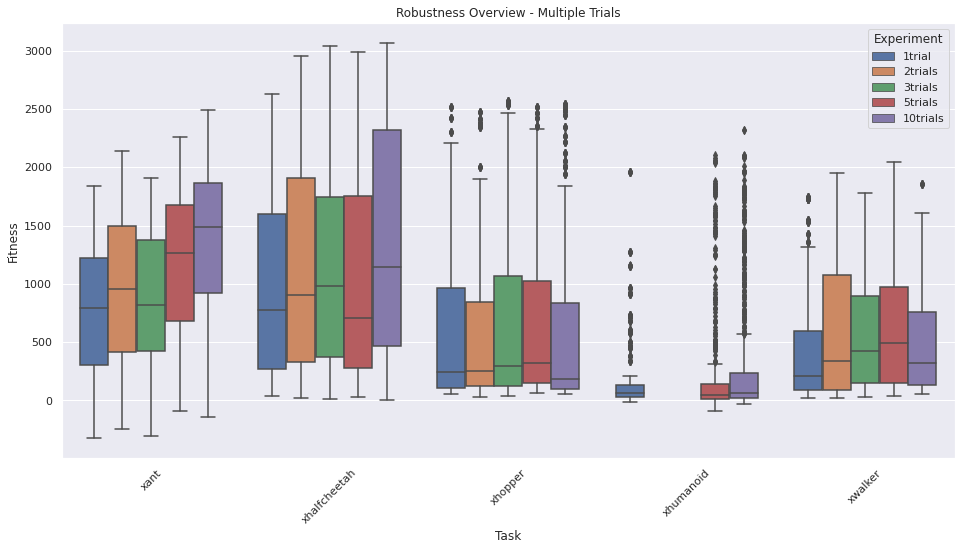

In [7]:
ax = sns.boxplot(
    data=data_plot,
    x='Task',
    y='Reward',
    hue='Experiment',
    hue_order=["1trial","2trials","3trials","5trials","10trials"])
_ = ax.set(xlabel='Task',
       ylabel='Fitness',
       title=f'Robustness Overview - Multiple Trials')
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

### Standard Post-evaluation with 10 episodes

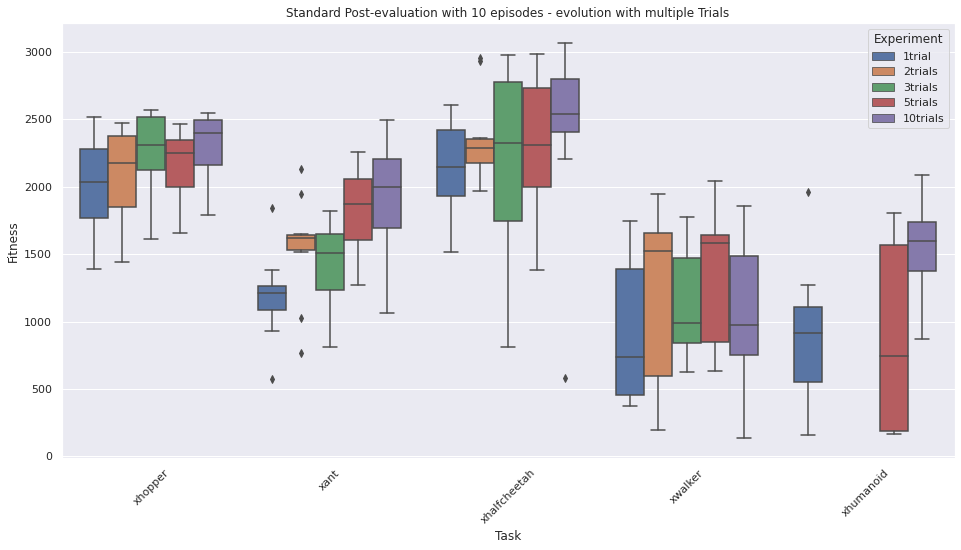

In [8]:
ax = sns.boxplot(
    data=data_plot.loc[(data_plot['noise_level']==0.01) & (data_plot['noise_steps']==1)],
    x='Task',
    order=["xhopper","xant","xhalfcheetah","xwalker","xhumanoid"],
    y='Reward',
    hue='Experiment',
    hue_order=["1trial","2trials","3trials","5trials","10trials"])
_ = ax.set(xlabel='Task',
       ylabel='Fitness',
       title=f'Standard Post-evaluation with 10 episodes - evolution with multiple Trials')
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

### Ant-V0

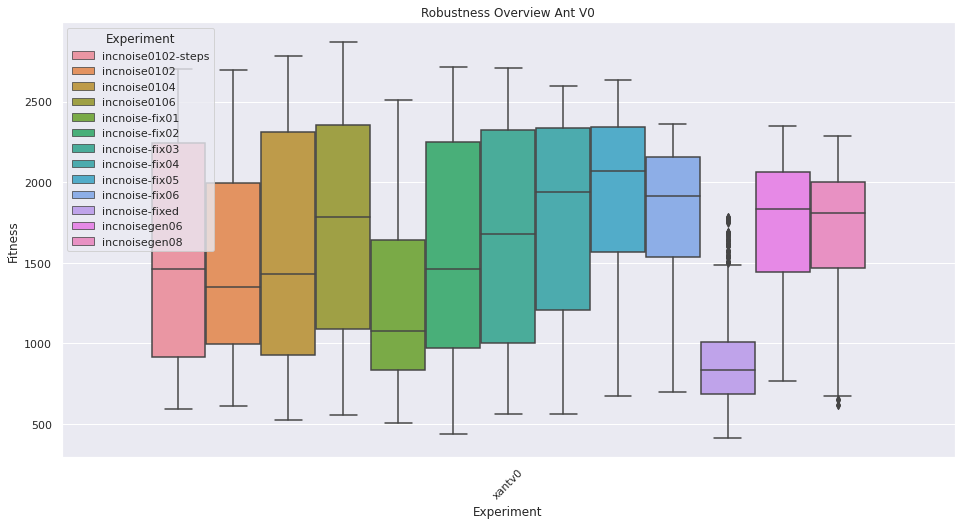

In [38]:
ax = sns.boxplot(
    data=data_plot.loc[data_plot['Task'].str.contains('xantv0')],
    x='Task',
    y='Reward',
    hue='Experiment')
_ = ax.set(xlabel='Experiment',
       ylabel='Fitness',
       title=f'Robustness Overview Ant V0')
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

### HalfCheetah-V0

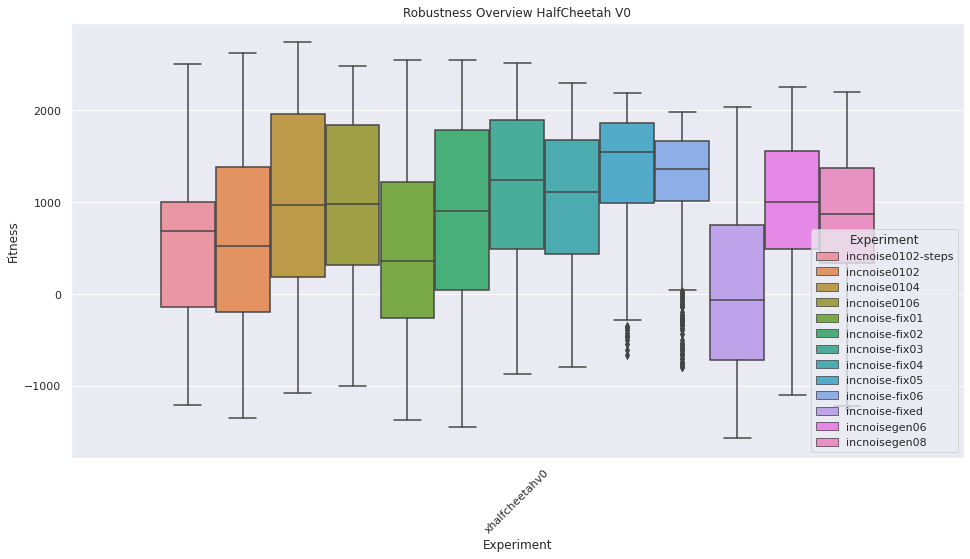

In [39]:
ax = sns.boxplot(
    data=data_plot.loc[data_plot['Task'].str.contains('xhalfcheetahv0')],
    x='Task',
    y='Reward',
    hue='Experiment')
_ = ax.set(xlabel='Experiment',
       ylabel='Fitness',
       title=f'Robustness Overview HalfCheetah V0')
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

### Showing only the best of each case - standard x fixed x incremental-trial x incremental-generation - V0

In [ ]:
#Incnoise-fixed diventa standard. 
#Incnoise-fixed03 diventa fixed-.01 (lo metterei per primo). 
#Incnoise-fix03 diventa fixed-.3, 
#Incnoise-fixed06 diventa fixed-.6. 
#incnoisegen08 diventa incnoise2-.73. 
#incnoise0104 diventa incremental2-.36. 
#incnoise0106 diventa incremental2-.55. Mancano i dati i walker2d e di humanoid (sperando che centra tutto).


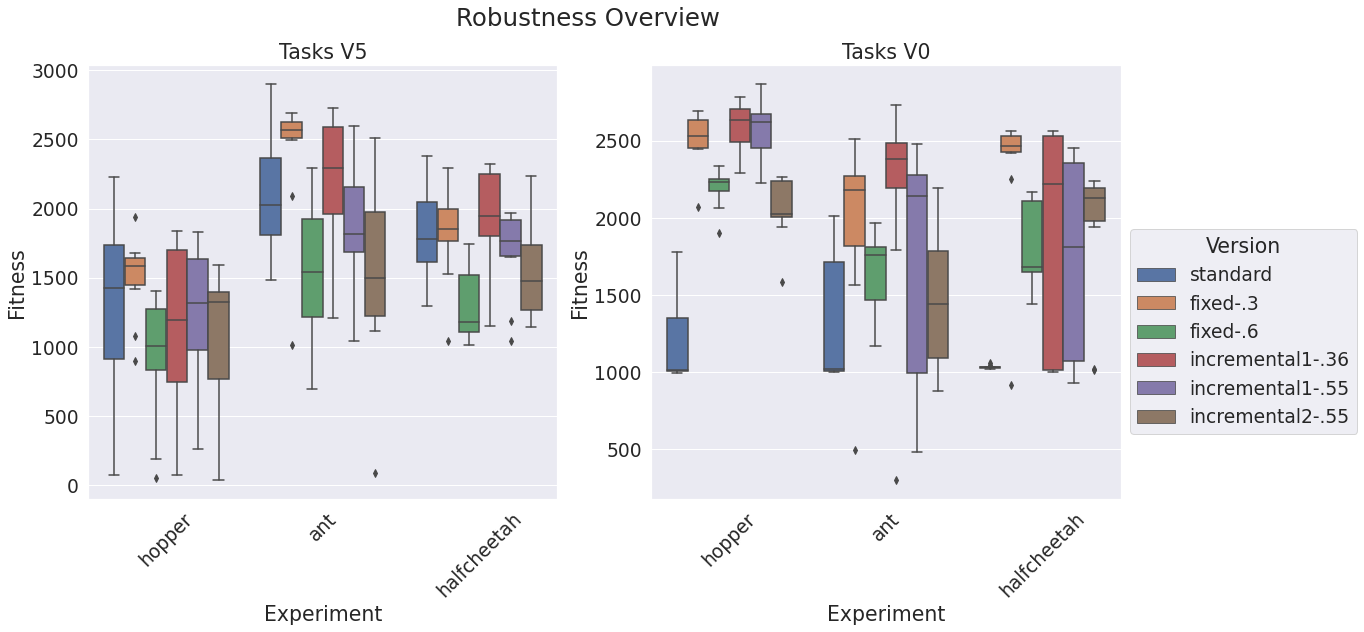

In [60]:
sns.set(font_scale=1.7)

fig, ax = plt.subplots(1,2)
fig.suptitle("Robustness Overview")

experiment_param = ",".join([f'\'{x}\'' for x in expList])
expList = ["incnoise-fixed","incnoise0104","incnoise0106","incnoise-fix03","incnoise-fix06","incnoisegen08"]
taskList = ["xhopper", "xant", "xhalfcheetah"]
g = plotExpTaskList(expList,taskList,title='Tasks V5',axis=ax[0])

# title
leg = g.get_legend()
leg.remove()
#new_title = 'Version'
#leg.set_title(new_title)
# replace labels
#new_labels=['standard','fixed-.3','fixed-.6','incremental1-.36','incremental1-.55', 'incremental2-.55']
#for t, l in zip(leg.texts, new_labels):
#    t.set_text(l)
    

experiment_param = ",".join([f'\'{x}\'' for x in expList])
expList = ["incnoise-fixed","incnoise0104","incnoise0106","incnoise-fix03","incnoise-fix06","incnoisegen08"]
taskList = ["xhopperv0", "xantv0", "xhalfcheetahv0"]
g = plotExpTaskList(expList,taskList,title='Tasks V0',axis=ax[1])
#plt.legend(title='Version', loc='lower left', labels=['incremental2-.55', 'standard','fixed-.3','fixed-.6','incnoise2-.73'])

plt.legend(bbox_to_anchor=(1.02, 0.15), loc=3, borderaxespad=0)

# title
leg = g.get_legend()
new_title = 'Version'
leg.set_title(new_title)
# replace labels
new_labels=['standard','fixed-.3','fixed-.6','incremental1-.36','incremental1-.55', 'incremental2-.55']
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)

fig.set_size_inches(18.5, 8)

In [44]:
data_plot.noise_level.unique()

array([0.01, 0.07, 0.13, 0.19, 0.25, 0.31, 0.37, 0.43, 0.49, 0.55])

## Standard and robustness post-evaluation conditions - V5

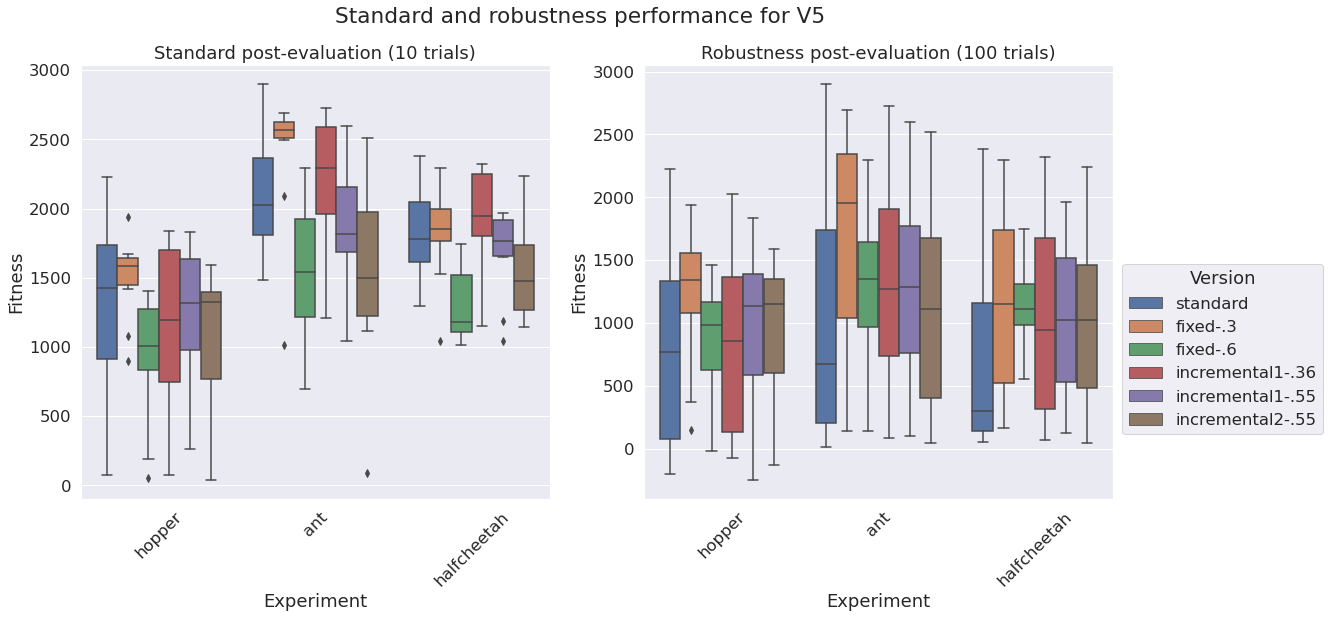

In [49]:
sns.set(font_scale=1.5)

fig, ax = plt.subplots(1,2)
fig.suptitle("Standard and robustness performance for V5")


experiment_param = ",".join([f'\'{x}\'' for x in expList])
expList = ["incnoise-fixed","incnoise0104","incnoise0106","incnoise-fix03","incnoise-fix06","incnoisegen08"]
taskList = ["xhopper", "xant", "xhalfcheetah"]
g = plotExpTaskListStd(expList,taskList,title='Standard post-evaluation (10 trials)',axis=ax[0])

# title
leg = g.get_legend()
leg.remove()    

experiment_param = ",".join([f'\'{x}\'' for x in expList])
expList = ["incnoise-fixed","incnoise0104","incnoise0106","incnoise-fix03","incnoise-fix06","incnoisegen08"]
taskList = ["xhopper", "xant", "xhalfcheetah"]
g = plotExpTaskList(expList,taskList,title='Robustness post-evaluation (100 trials)',axis=ax[1])
#plt.legend(title='Version', loc='lower left', labels=['incremental2-.36','incremental2-.55', 'standard','fixed-.3','fixed-.6','incnoise2-.73'])

plt.legend(bbox_to_anchor=(1.02, 0.15), loc=3, borderaxespad=0)


leg = g.get_legend()
new_title = 'Version'
leg.set_title(new_title)
# replace labels
new_labels=['standard','fixed-.3','fixed-.6','incremental1-.36','incremental1-.55', 'incremental2-.55']
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)

fig.set_size_inches(18.5, 8)

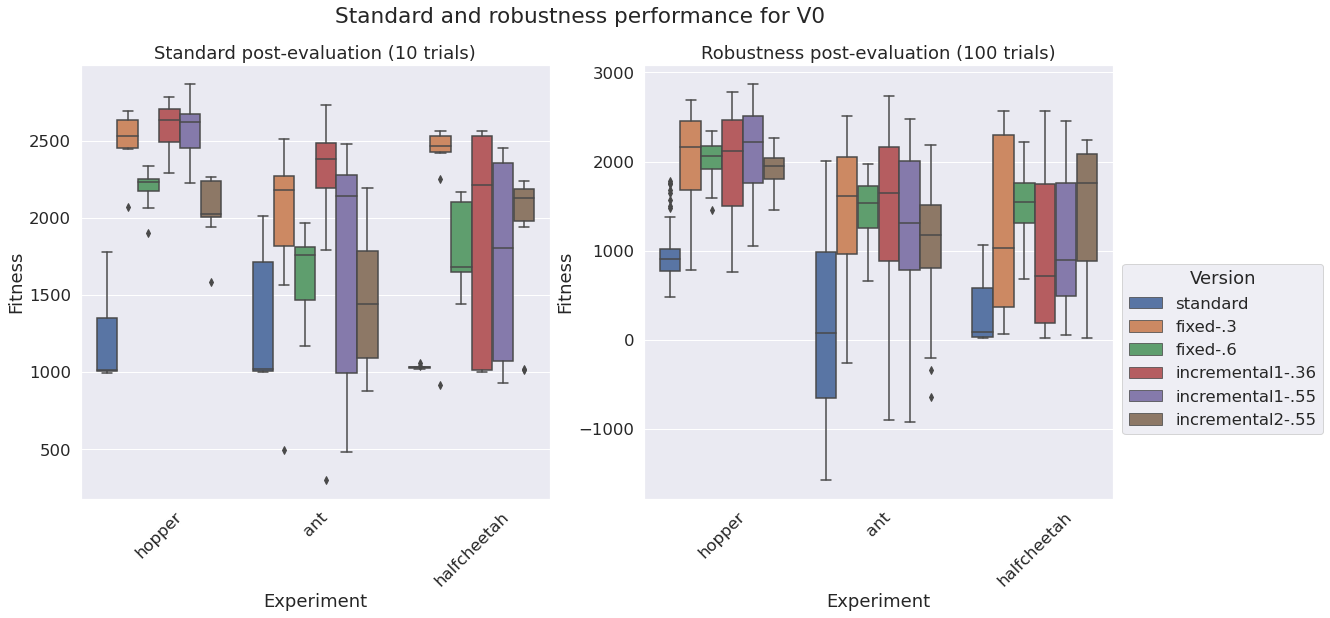

In [50]:
sns.set(font_scale=1.5)

fig, ax = plt.subplots(1,2)
fig.suptitle("Standard and robustness performance for V0")


experiment_param = ",".join([f'\'{x}\'' for x in expList])
expList = ["incnoise-fixed","incnoise0104","incnoise0106","incnoise-fix03","incnoise-fix06","incnoisegen08"]
taskList = ["xhopperv0", "xantv0", "xhalfcheetahv0"]
g = plotExpTaskListStd(expList,taskList,title='Standard post-evaluation (10 trials)',axis=ax[0])

# title
leg = g.get_legend()
leg.remove()    

experiment_param = ",".join([f'\'{x}\'' for x in expList])
expList = ["incnoise-fixed","incnoise0104","incnoise0106","incnoise-fix03","incnoise-fix06","incnoisegen08"]
taskList = ["xhopperv0", "xantv0", "xhalfcheetahv0"]
g = plotExpTaskList(expList,taskList,title='Robustness post-evaluation (100 trials)',axis=ax[1])
#plt.legend(title='Version', loc='lower left', labels=['incremental2-.36','incremental2-.55', 'standard','fixed-.3','fixed-.6','incnoise2-.73'])

plt.legend(bbox_to_anchor=(1.02, 0.15), loc=3, borderaxespad=0)


leg = g.get_legend()
new_title = 'Version'
leg.set_title(new_title)
# replace labels
new_labels=['standard','fixed-.3','fixed-.6','incremental1-.36','incremental1-.55', 'incremental2-.55']
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)

fig.set_size_inches(18.5, 8)

## Plot by task x noiseLevel

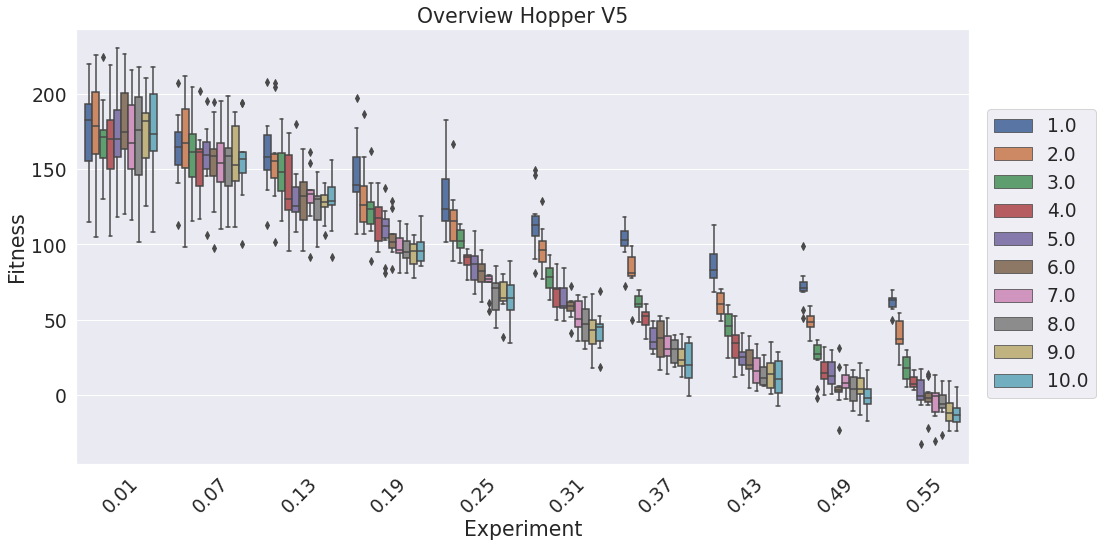

In [81]:
noise_level = [0.01, 0.07, 0.13, 0.19, 0.25, 0.31, 0.37, 0.43, 0.49, 0.55]
noise_steps = list(range(1,11))

ax = sns.boxplot(
    data=data_plot.query(
            f' \
            Experiment == "incnoise-fix03" and  \
            Task == "xhumanoid" and \
            noise_level == (@noise_level) and \
            noise_steps == (@noise_steps)'
        ,engine="python"),
    x='noise_level',
    y='Reward',
    hue='noise_steps')
_ = ax.set(xlabel='Experiment',
       ylabel='Fitness',
       title=f'Overview Hopper V5')
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.legend(bbox_to_anchor=(1.02, 0.15), loc=3, borderaxespad=0)

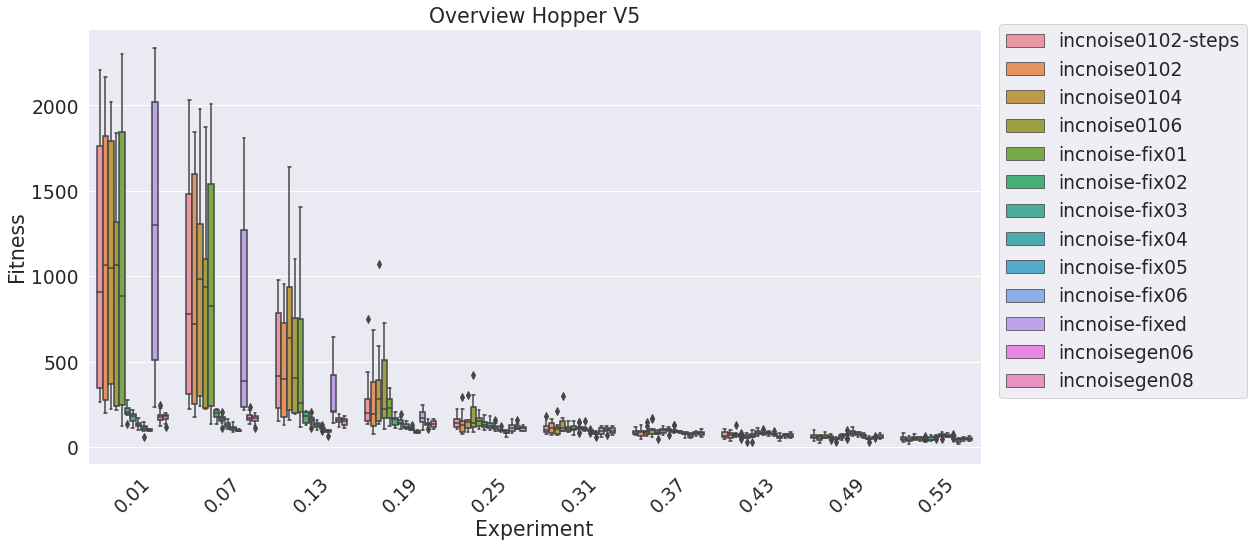

In [95]:
noise_level = [0.01, 0.07, 0.13, 0.19, 0.25, 0.31, 0.37, 0.43, 0.49, 0.55]
noise_steps = list(range(1,11))

expList2 = data['Experiment'].unique()
ax = sns.boxplot(
    data=data_plot.query(
            f' \
            Experiment.isin(@expList2) and  \
            Task == "xhumanoid" and \
            noise_level == (@noise_level) and \
            noise_steps == 1'
        ,engine="python"),
    x='noise_level',
    y='Reward',
    hue='Experiment')
_ = ax.set(xlabel='Experiment',
       ylabel='Fitness',
       title=f'Overview Hopper V5')
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.legend(bbox_to_anchor=(1.02, 0.15), loc=3, borderaxespad=0)

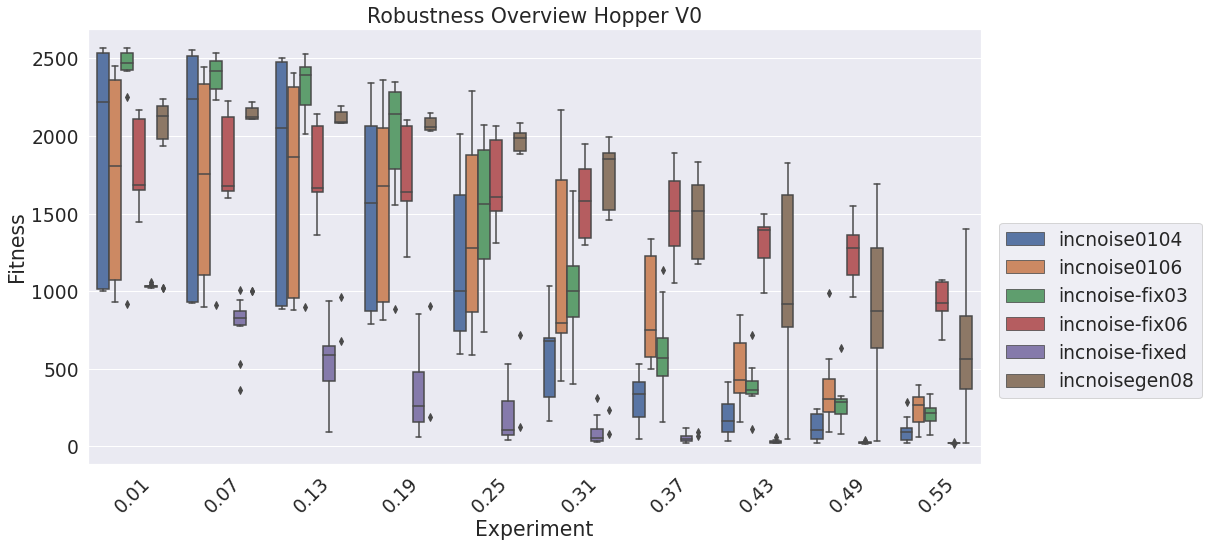

In [69]:
noise_level = [0.01, 0.07, 0.13, 0.19, 0.25, 0.31, 0.37, 0.43, 0.49, 0.55]
noise_steps = list(range(1,11))

ax = sns.boxplot(
    data=data_plot.loc[data_plot['Task'].str.contains('xhopperv0')].query(
            f' \
            Experiment.isin(@expList) and  \
            Task.isin(@taskList) and \
            noise_level == (@noise_level) and \
            noise_steps == 1'
        ,engine="python"),
    x='noise_level',
    y='Reward',
    hue='Experiment')
_ = ax.set(xlabel='Experiment',
       ylabel='Fitness',
       title=f'Robustness Overview Hopper V0')
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.legend(bbox_to_anchor=(1.02, 0.15), loc=3, borderaxespad=0)

# Old codes

### Walker-V0

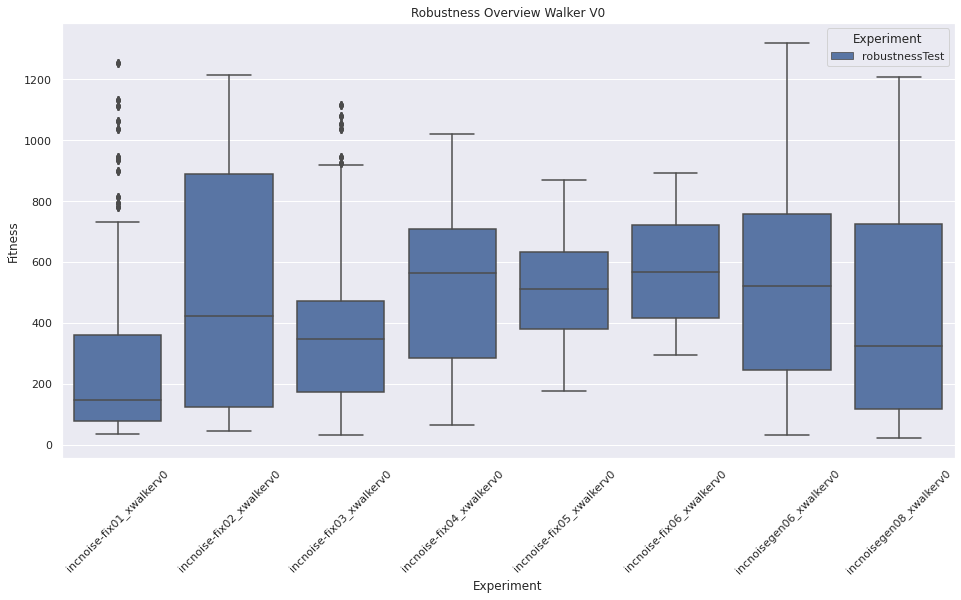

In [54]:
ax = sns.boxplot(
    data=data_plot.loc[data_plot['Task'].str.contains('xwalkerv0')],
    x='Task',
    y='Reward',
    hue='Experiment')
_ = ax.set(xlabel='Experiment',
       ylabel='Fitness',
       title=f'Robustness Overview Walker V0')
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

### Humanoid-V0 -- ATTENTION - BY MISTAKE THIS IS V5, ALSO

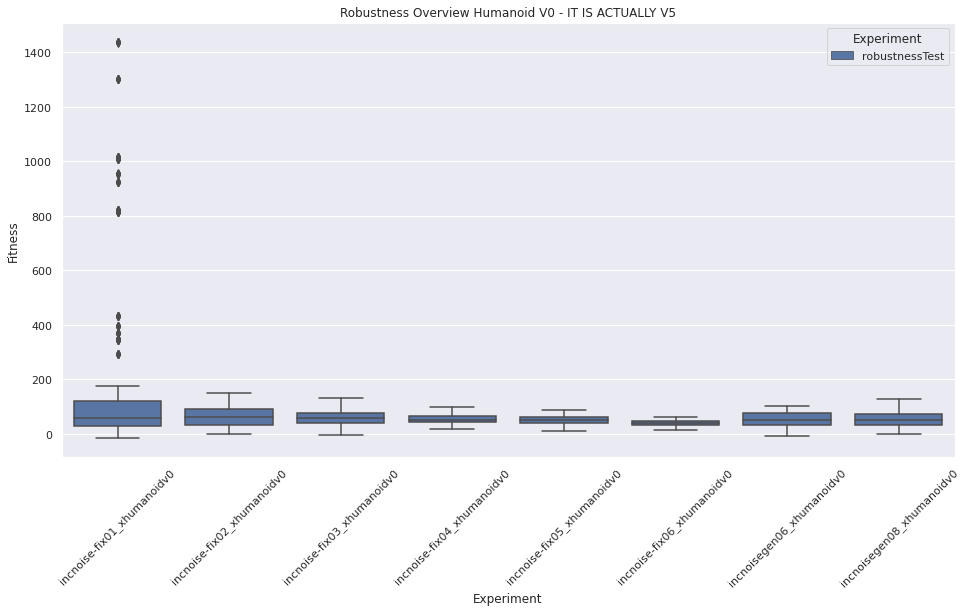

In [53]:
ax = sns.boxplot(
    data=data_plot.loc[data_plot['Task'].str.contains('xhumanoidv0')],
    x='Task',
    y='Reward',
    hue='Experiment')
_ = ax.set(xlabel='Experiment',
       ylabel='Fitness',
       title=f'Robustness Overview Humanoid V0 - IT IS ACTUALLY V5')
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

### Hopper-V5

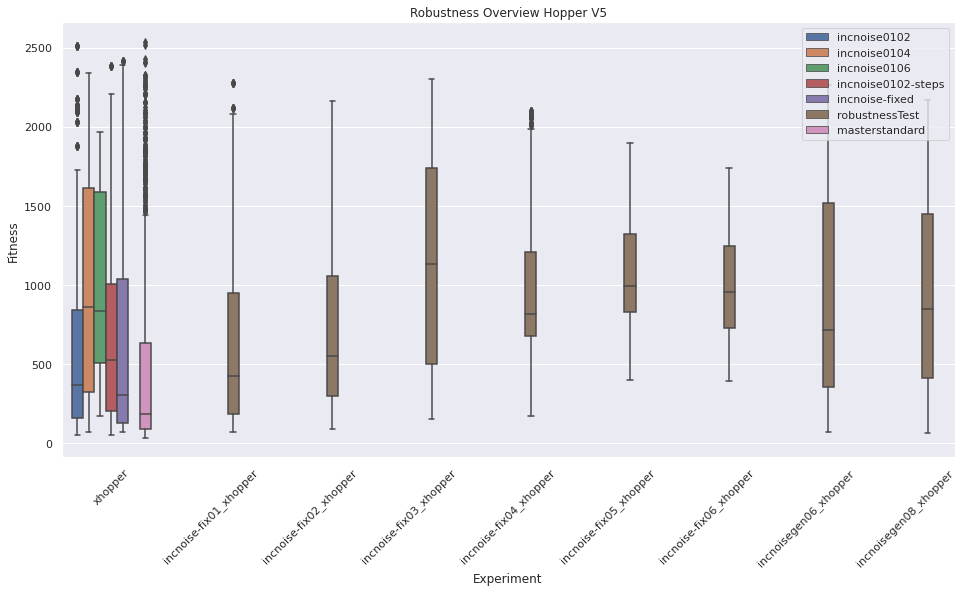

In [52]:
ax = sns.boxplot(
    data=data_plot.loc[data_plot['Task'].str.contains('xhopper$')],
    x='Task',
    y='Reward',
    hue='Experiment')
_ = ax.set(xlabel='Experiment',
       ylabel='Fitness',
       title=f'Robustness Overview Hopper V5')
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.legend(loc='upper right')

### Ant-V5

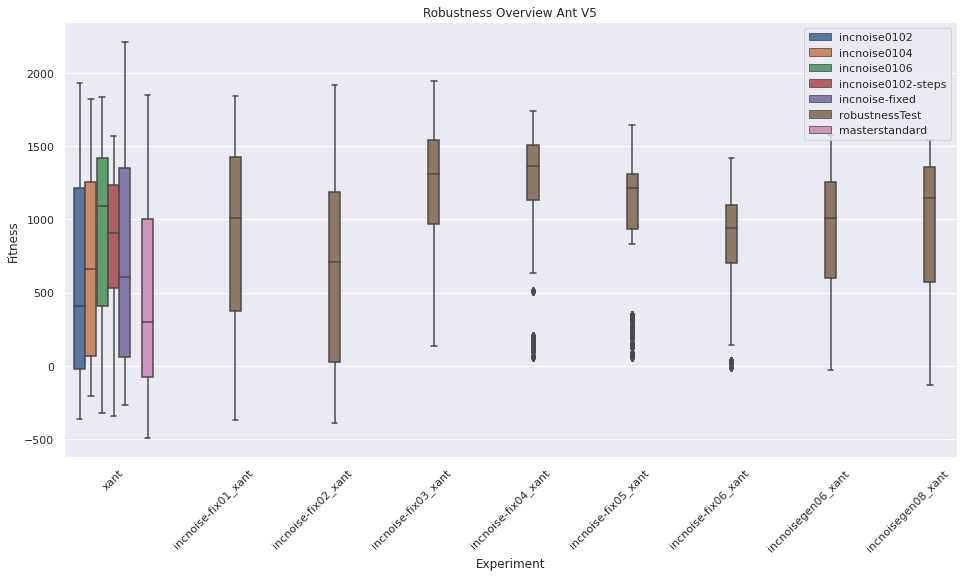

In [51]:
ax = sns.boxplot(
    data=data_plot.loc[data_plot['Task'].str.contains('xant$')],
    x='Task',
    y='Reward',
    hue='Experiment')
_ = ax.set(xlabel='Experiment',
       ylabel='Fitness',
       title=f'Robustness Overview Ant V5')
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.legend(loc='upper right')

### HalfCheetah-V5

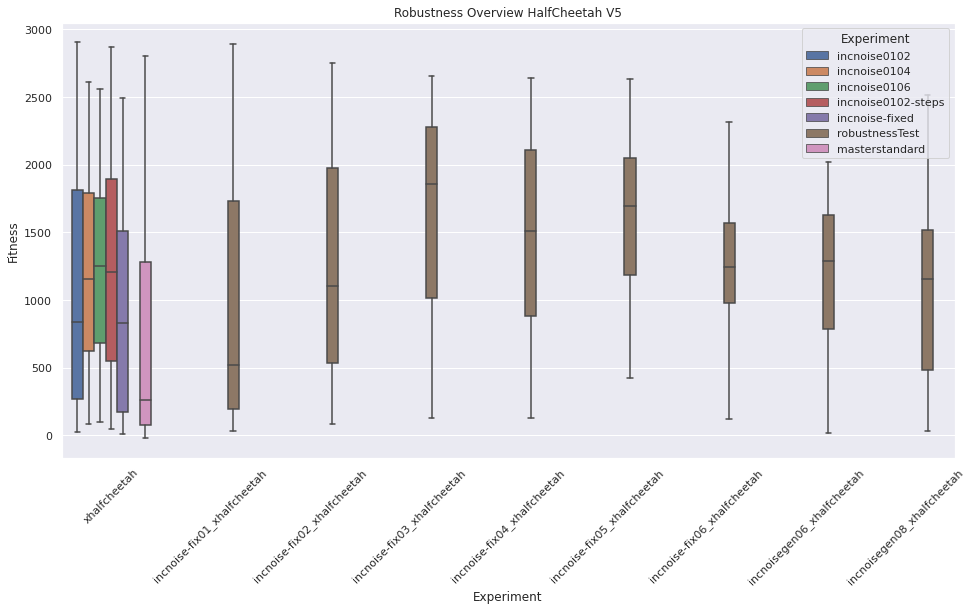

In [45]:
ax = sns.boxplot(
    data=data_plot.loc[data_plot['Task'].str.contains('xhalfcheetah$')],
    x='Task',
    y='Reward',
    hue='Experiment')
_ = ax.set(xlabel='Experiment',
       ylabel='Fitness',
       title=f'Robustness Overview HalfCheetah V5')
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

### Showing only the best of each case - standard x fixed x incremental-trial x incremental-generation - V5

In [1]:
experiment_param = ",".join([f'\'{x}\'' for x in exp_list])
expList = ["incnoise-fixed","incnoise0104","incnoise0106","incnoise-fix03","incnoise-fix06","incnoisegen08"]
taskList = ["xhopper", "xant", "xhalfcheetah"]
g = plotExpTaskList(expList,taskList,title='Robustness Overview V5')

# title
leg = g.get_legend()
new_title = 'Version'
leg.set_title(new_title)
# replace labels
new_labels=['standard','fixed-.3','fixed-.6','incremental1-.36','incremental1-.55', 'incremental2-.55']
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)

NameError: name 'exp_list' is not defined

## Standard post-evaluation conditions (10 trials) - V5

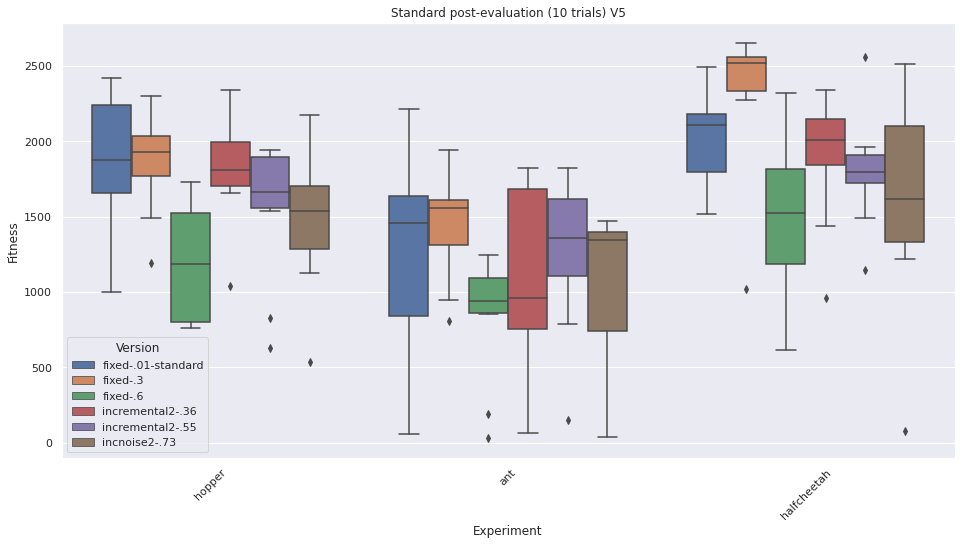

In [120]:
experiment_param = ",".join([f'\'{x}\'' for x in exp_list])
expList = ["incnoise-fixed","incnoise0104","incnoise0106","incnoise-fix03","incnoise-fix06","incnoisegen08"]
taskList = ["xhopper", "xant", "xhalfcheetah"]
g = plotExpTaskListStd(expList,taskList,title='Standard post-evaluation (10 trials) V5')

# title
leg = g.get_legend()
new_title = 'Version'
leg.set_title(new_title)
# replace labels
new_labels=['standard','fixed-.3','fixed-.6','incremental1-.36','incremental1-.55', 'incremental2-.55']
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)

### Walker-V5

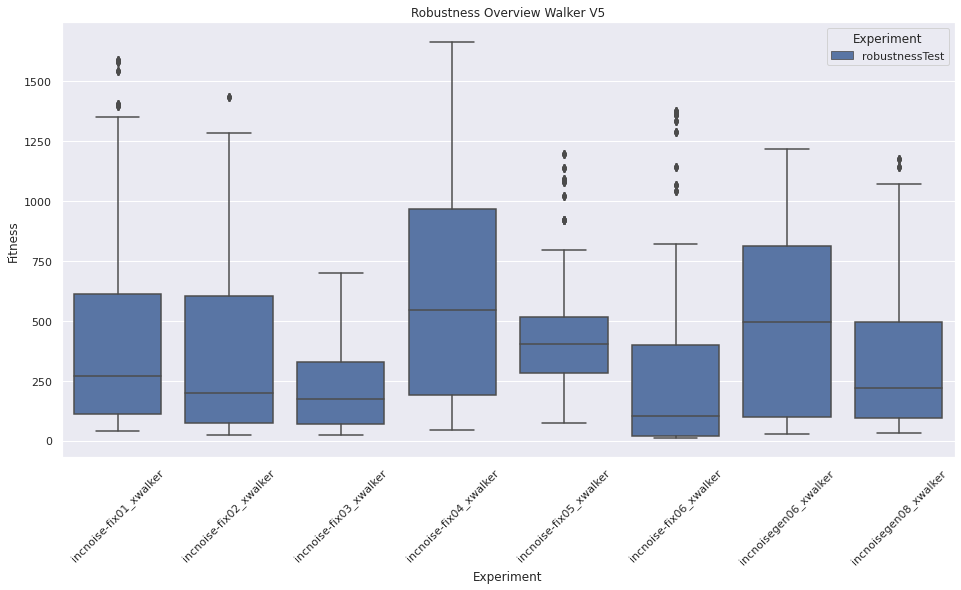

In [46]:
ax = sns.boxplot(
    data=data_plot.loc[data_plot['Task'].str.contains('xwalker$')],
    x='Task',
    y='Reward',
    hue='Experiment')
_ = ax.set(xlabel='Experiment',
       ylabel='Fitness',
       title=f'Robustness Overview Walker V5')
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

### Humanoid-V5

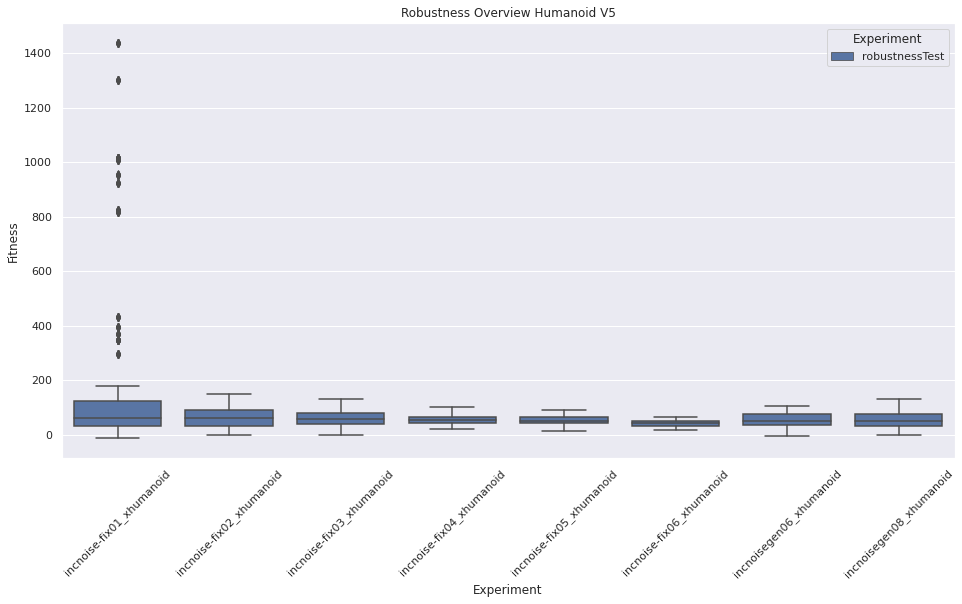

In [47]:
ax = sns.boxplot(
    data=data_plot.loc[data_plot['Task'].str.contains('xhumanoid$')],
    x='Task',
    y='Reward',
    hue='Experiment')
_ = ax.set(xlabel='Experiment',
       ylabel='Fitness',
       title=f'Robustness Overview Humanoid V5')
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

## Standard post-evaluation conditions (10 trials)

### Hopper V0

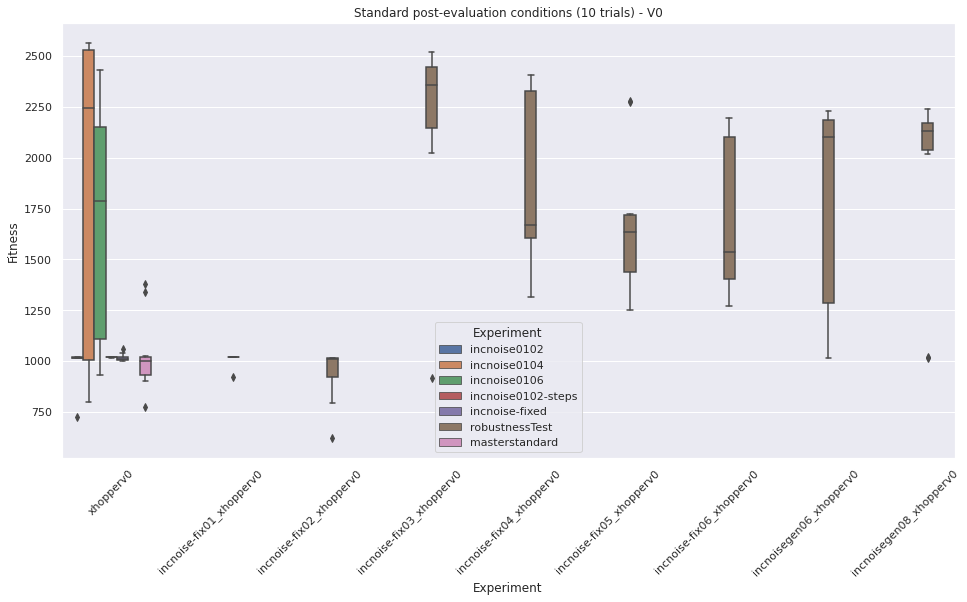

In [30]:
experiment_param = ",".join([f'\'{x}\'' for x in exp_list])
ax = sns.boxplot(
    data=data_plot.query(
        f' \
        Experiment.isin(@exp_list) and  \
        Task.str.contains("hopperv0") and \
        noise_level == 0.01 and \
        noise_steps == 1'
    ,engine="python"),
    x='Task',
    y='Reward',
    hue='Experiment')
_ = ax.set(xlabel='Experiment',
       ylabel='Fitness',
       title=f'Standard post-evaluation conditions (10 trials) - V0')
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

### Hopper V5

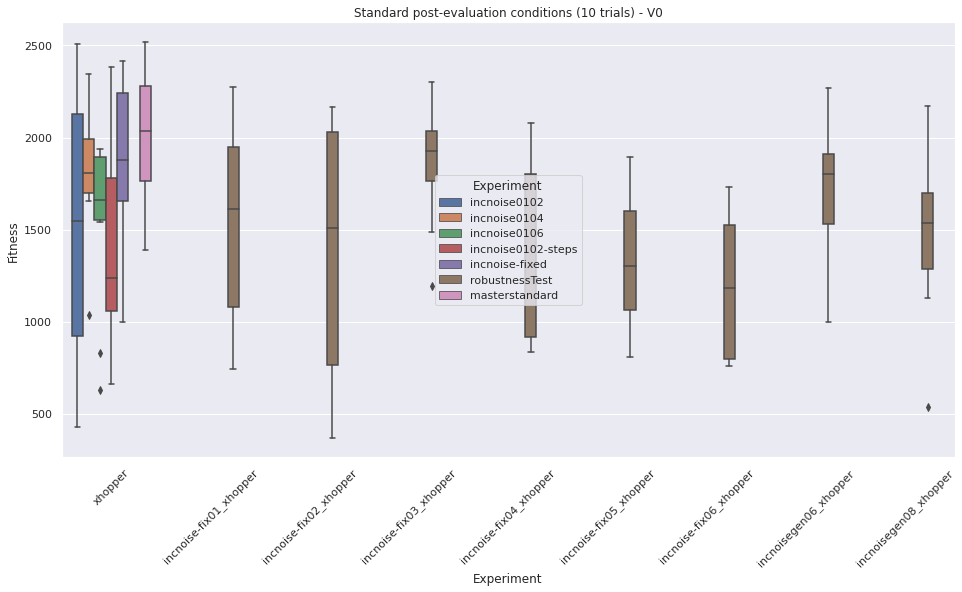

In [31]:
experiment_param = ",".join([f'\'{x}\'' for x in exp_list])
ax = sns.boxplot(
    data=data_plot.query(
        f' \
        Experiment.isin(@exp_list) and  \
        Task.str.contains("hopper$") and \
        noise_level == 0.01 and \
        noise_steps == 1'
    ,engine="python"),
    x='Task',
    y='Reward',
    hue='Experiment')
_ = ax.set(xlabel='Experiment',
       ylabel='Fitness',
       title=f'Standard post-evaluation conditions (10 trials) - V0')
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

### Ant V0

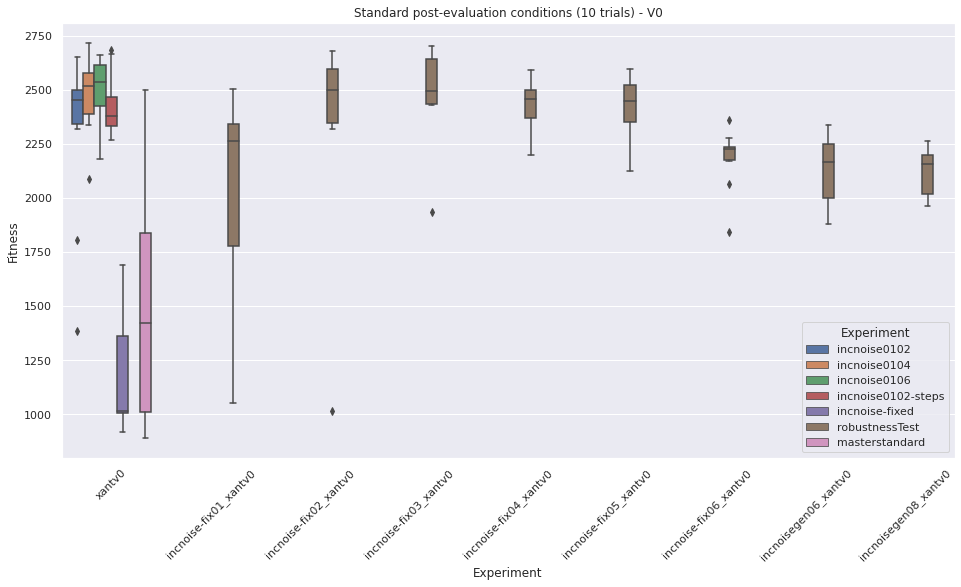

In [43]:
experiment_param = ",".join([f'\'{x}\'' for x in exp_list])
ax = sns.boxplot(
    data=data_plot.query(
        f' \
        Experiment.isin(@exp_list) and  \
        Task.str.contains("antv0") and \
        noise_level == 0.01 and \
        noise_steps == 1'
    ,engine="python"),
    x='Task',
    y='Reward',
    hue='Experiment')
_ = ax.set(xlabel='Experiment',
       ylabel='Fitness',
       title=f'Standard post-evaluation conditions (10 trials) - V0')
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

### Ant V5

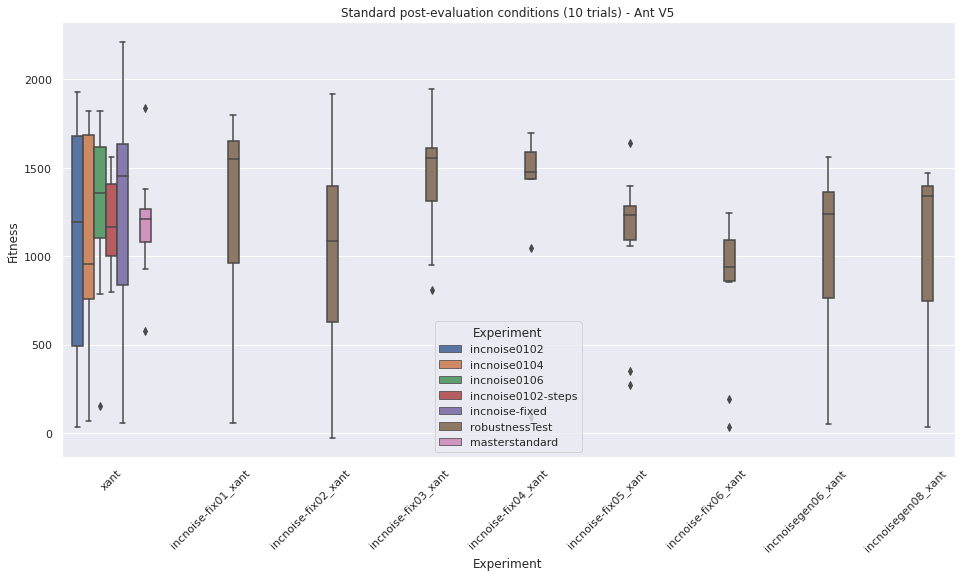

In [34]:
experiment_param = ",".join([f'\'{x}\'' for x in exp_list])
ax = sns.boxplot(
    data=data_plot.query(
        f' \
        Experiment.isin(@exp_list) and  \
        Task.str.contains("ant$") and \
        noise_level == 0.01 and \
        noise_steps == 1'
    ,engine="python"),
    x='Task',
    y='Reward',
    hue='Experiment')
_ = ax.set(xlabel='Experiment',
       ylabel='Fitness',
       title=f'Standard post-evaluation conditions (10 trials) - Ant V5')
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

### HalfCheetah V0

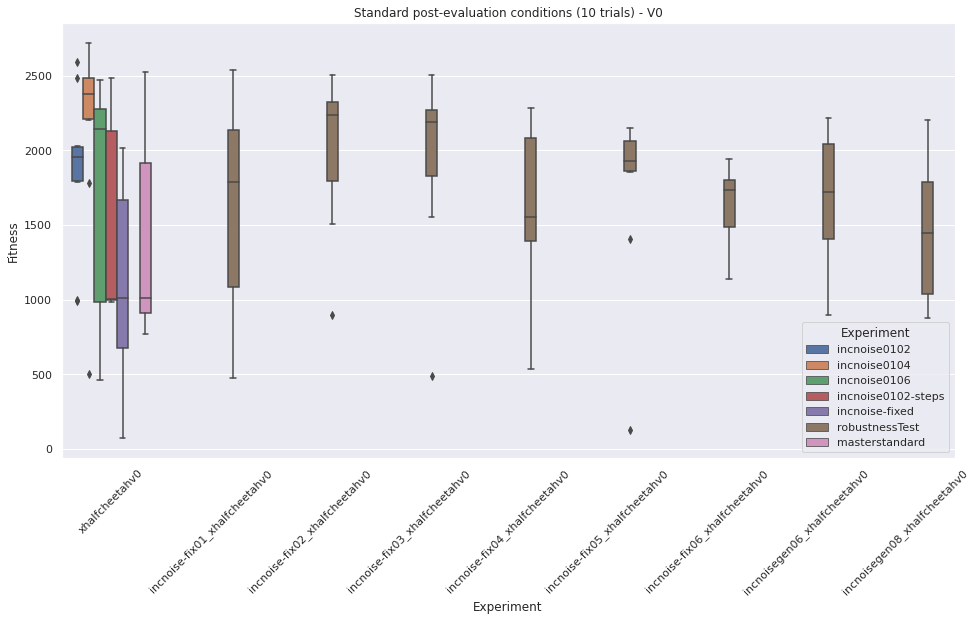

In [35]:
experiment_param = ",".join([f'\'{x}\'' for x in exp_list])
ax = sns.boxplot(
    data=data_plot.query(
        f' \
        Experiment.isin(@exp_list) and  \
        Task.str.contains("halfcheetahv0") and \
        noise_level == 0.01 and \
        noise_steps == 1'
    ,engine="python"),
    x='Task',
    y='Reward',
    hue='Experiment')
_ = ax.set(xlabel='Experiment',
       ylabel='Fitness',
       title=f'Standard post-evaluation conditions (10 trials) - V0')
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

### HalfCheetah V5

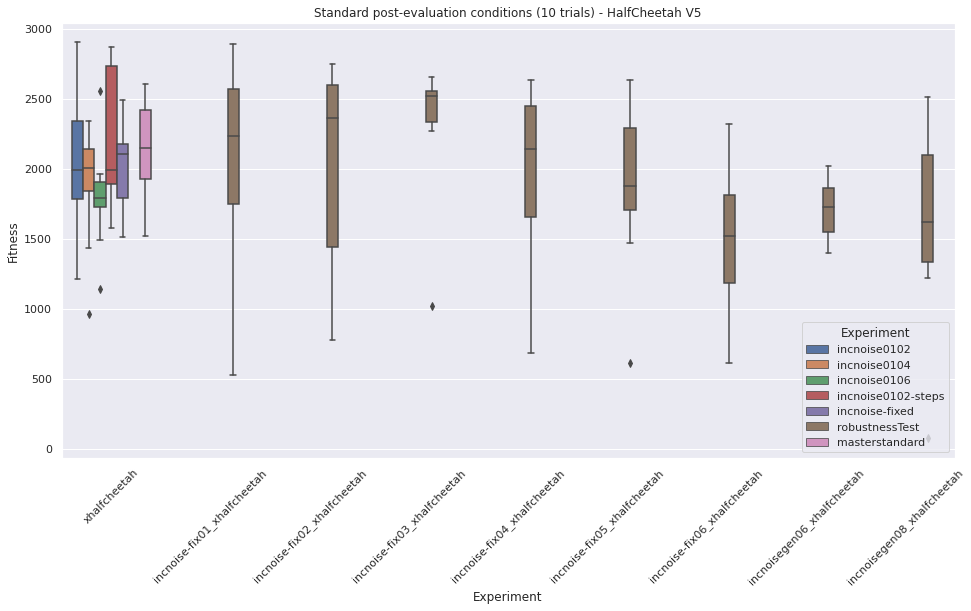

In [63]:
experiment_param = ",".join([f'\'{x}\'' for x in exp_list])
ax = sns.boxplot(
    data=data_plot.query(
        f' \
        Experiment.isin(@exp_list) and  \
        Task.str.contains("halfcheetah$") and \
        noise_level == 0.01 and \
        noise_steps == 1'
    ,engine="python"),
    x='Task',
    y='Reward',
    hue='Experiment')
_ = ax.set(xlabel='Experiment',
       ylabel='Fitness',
       title=f'Standard post-evaluation conditions (10 trials) - HalfCheetah V5')
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

### Walker V0

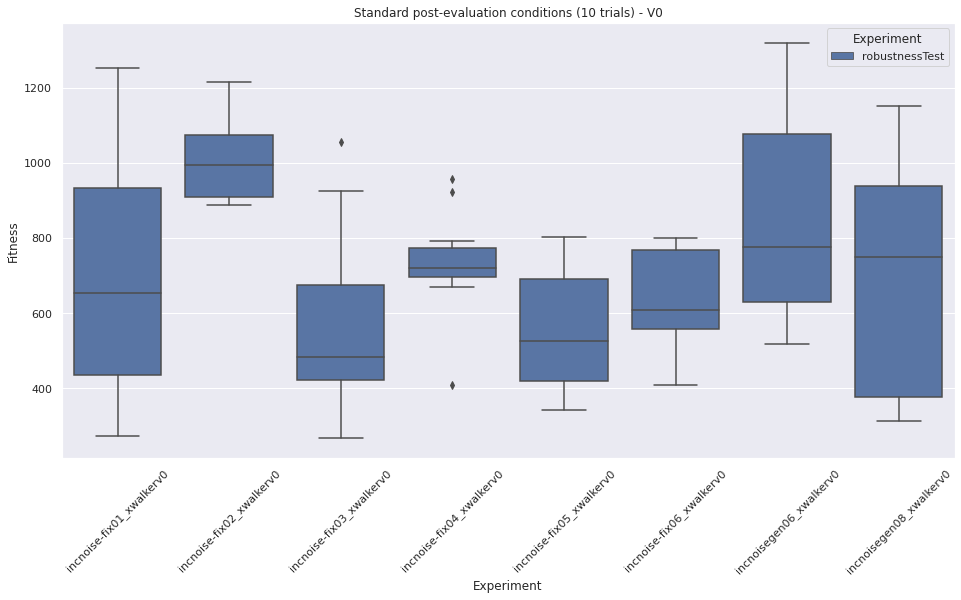

In [37]:
experiment_param = ",".join([f'\'{x}\'' for x in exp_list])
ax = sns.boxplot(
    data=data_plot.query(
        f' \
        Experiment.isin(@exp_list) and  \
        Task.str.contains("walkerv0") and \
        noise_level == 0.01 and \
        noise_steps == 1'
    ,engine="python"),
    x='Task',
    y='Reward',
    hue='Experiment')
_ = ax.set(xlabel='Experiment',
       ylabel='Fitness',
       title=f'Standard post-evaluation conditions (10 trials) - V0')
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

### Walker V5

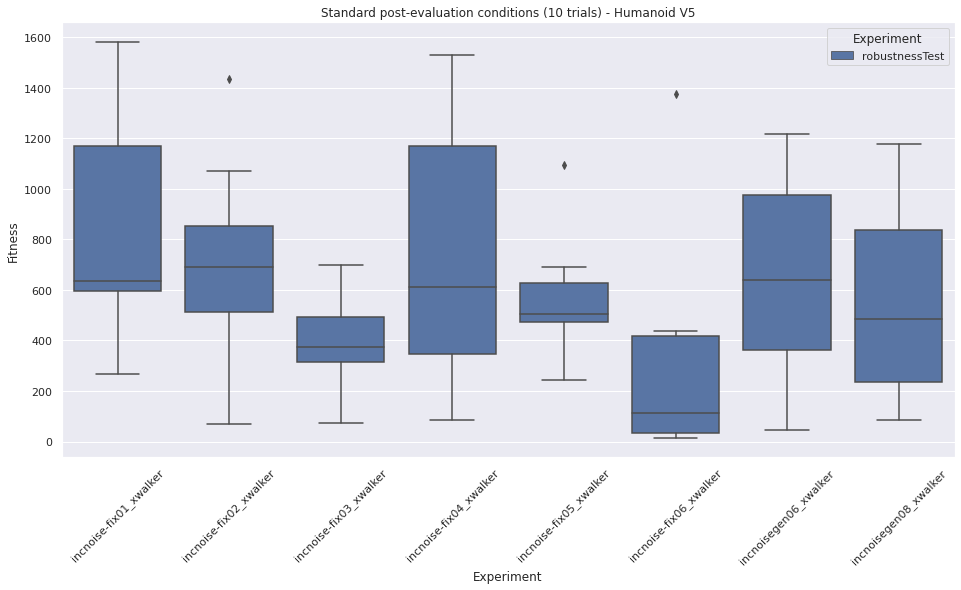

In [64]:
experiment_param = ",".join([f'\'{x}\'' for x in exp_list])
ax = sns.boxplot(
    data=data_plot.query(
        f' \
        Experiment.isin(@exp_list) and  \
        Task.str.contains("walker$") and \
        noise_level == 0.01 and \
        noise_steps == 1'
    ,engine="python"),
    x='Task',
    y='Reward',
    hue='Experiment')
_ = ax.set(xlabel='Experiment',
       ylabel='Fitness',
       title=f'Standard post-evaluation conditions (10 trials) - Humanoid V5')
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

### Humanoid V0 was not run

### Humanoid V5

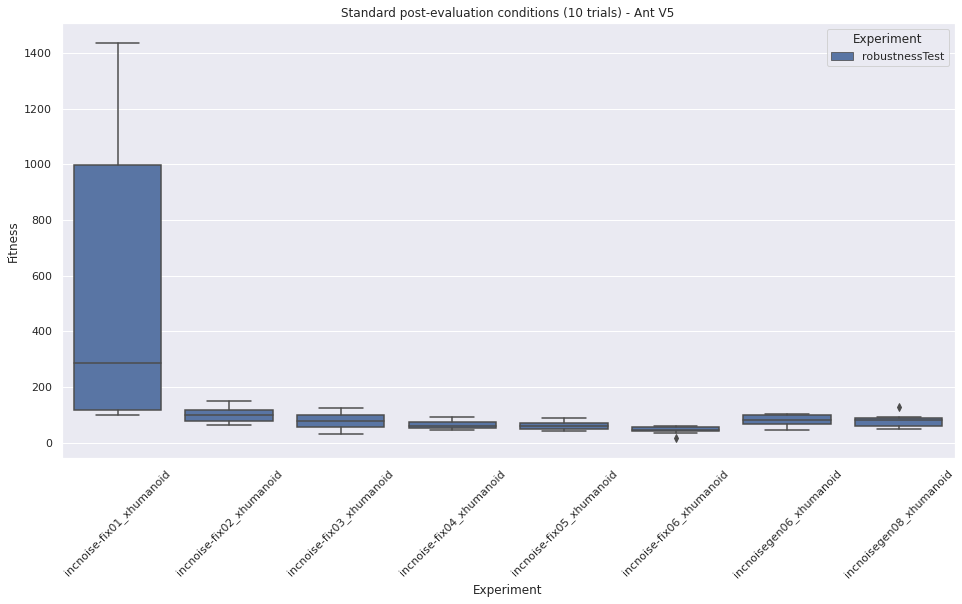

In [40]:
experiment_param = ",".join([f'\'{x}\'' for x in exp_list])
ax = sns.boxplot(
    data=data_plot.query(
        f' \
        Experiment.isin(@exp_list) and  \
        Task.str.contains("humanoid$") and \
        noise_level == 0.01 and \
        noise_steps == 1'
    ,engine="python"),
    x='Task',
    y='Reward',
    hue='Experiment')
_ = ax.set(xlabel='Experiment',
       ylabel='Fitness',
       title=f'Standard post-evaluation conditions (10 trials) - Ant V5')
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

## Previous results

## Robustness overview - v5

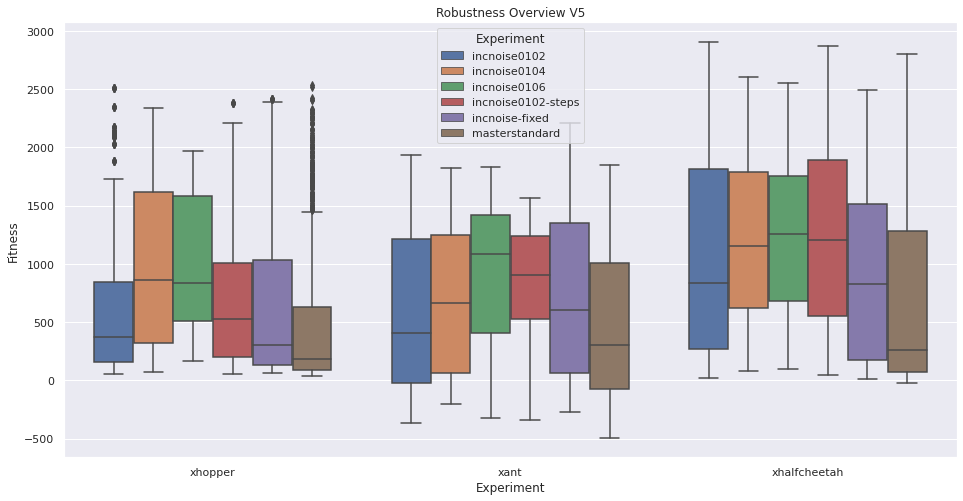

In [30]:
ax = sns.boxplot(
    data=data_plot.query(
        f' \
        Experiment.isin(@exp_list) and  \
        Task.isin(@tasks_v5)'
    ,engine="python"),
    x='Task',
    y='Reward',
    hue='Experiment')
_ = ax.set(xlabel='Experiment',
       ylabel='Fitness',
       title=f'Robustness Overview V5')

## Standard post-evaluation conditions (10 trials) - V5

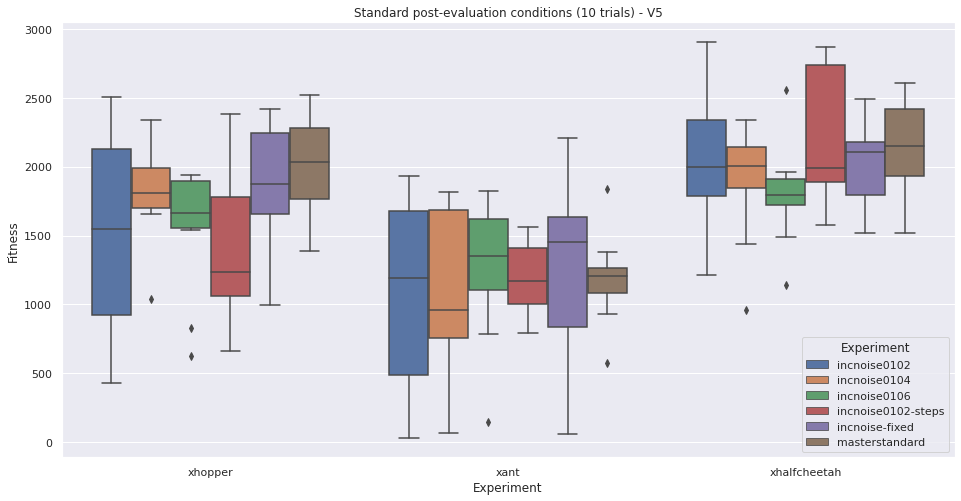

In [5]:
ax = sns.boxplot(
    data=data_plot.query(
        f' \
        Experiment.isin(@exp_list) and  \
        Task.isin(@tasks_v5) and \
        noise_level == 0.01 and \
        noise_steps == 1'
    ,engine="python"),
    x='Task',
    y='Reward',
    hue='Experiment')
_ = ax.set(xlabel='Experiment',
       ylabel='Fitness',
       title=f'Standard post-evaluation conditions (10 trials) - V5')

In [6]:
tmp = data_plot.query(
        f' \
        Experiment.isin(@exp_list) and  \
        Task.isin(@tasks_v5) and \
        noise_level == 0.01 and \
        noise_steps == 1'
    ,engine="python")
data.query('Experiment == "incnoise-nsteps" and Task=="xhopper" and corr_n_steps==1 and noise_level==0.01').iloc[50:100,:].head(50)[['Seed','Trial','Reward']]

,Seed,Trial,Reward


## Robustness overview - v0

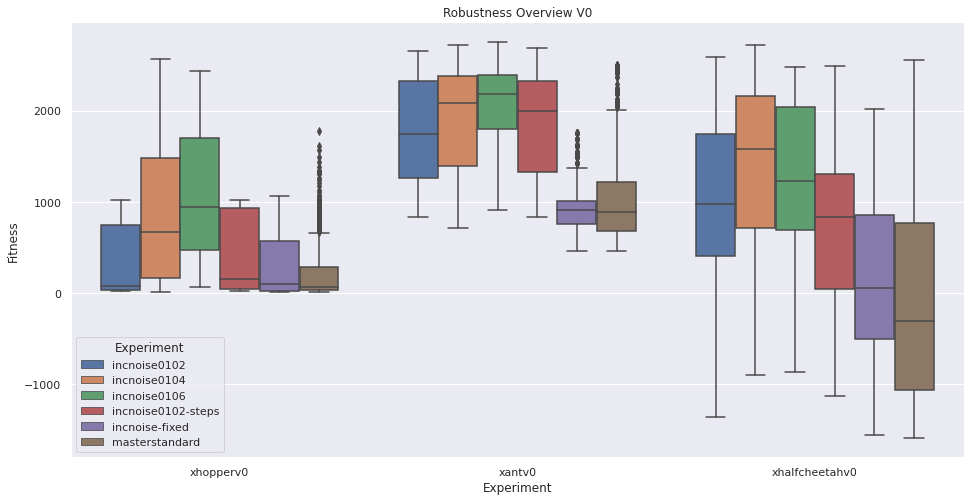

In [7]:
ax = sns.boxplot(
    data=data_plot.query(
        f' \
        Experiment.isin(@exp_list) and  \
        Task.isin(@tasks_v0)'
    ,engine="python"),
    x='Task',
    y='Reward',
    hue='Experiment')
_ = ax.set(xlabel='Experiment',
       ylabel='Fitness',
       title=f'Robustness Overview V0')

## Standard post-evaluation conditions (10 trials) - V0

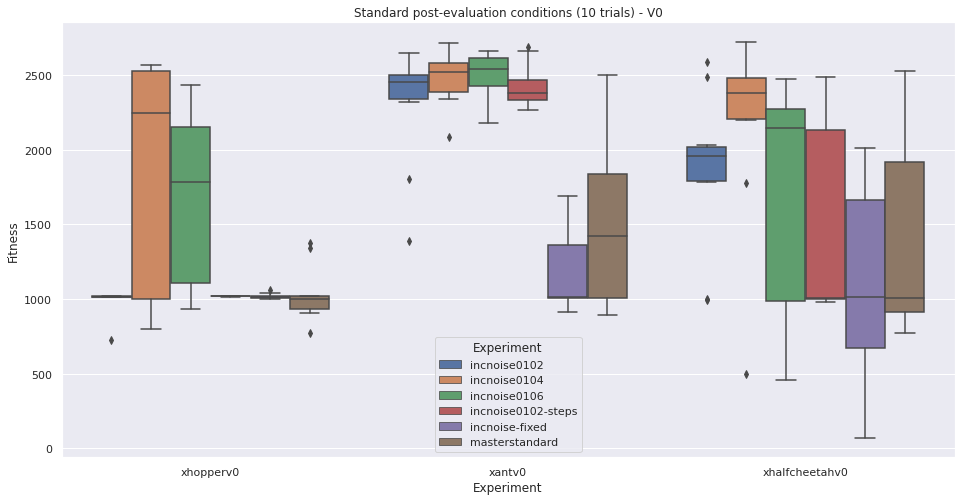

In [8]:
experiment_param = ",".join([f'\'{x}\'' for x in exp_list])
ax = sns.boxplot(
    data=data_plot.query(
        f' \
        Experiment.isin(@exp_list) and  \
        Task.isin(@tasks_v0) and \
        noise_level == 0.01 and \
        noise_steps == 1'
    ,engine="python"),
    x='Task',
    y='Reward',
    hue='Experiment')
_ = ax.set(xlabel='Experiment',
       ylabel='Fitness',
       title=f'Standard post-evaluation conditions (10 trials) - V0')

## Experiment vs Noise Level - Uncorrelated - V0

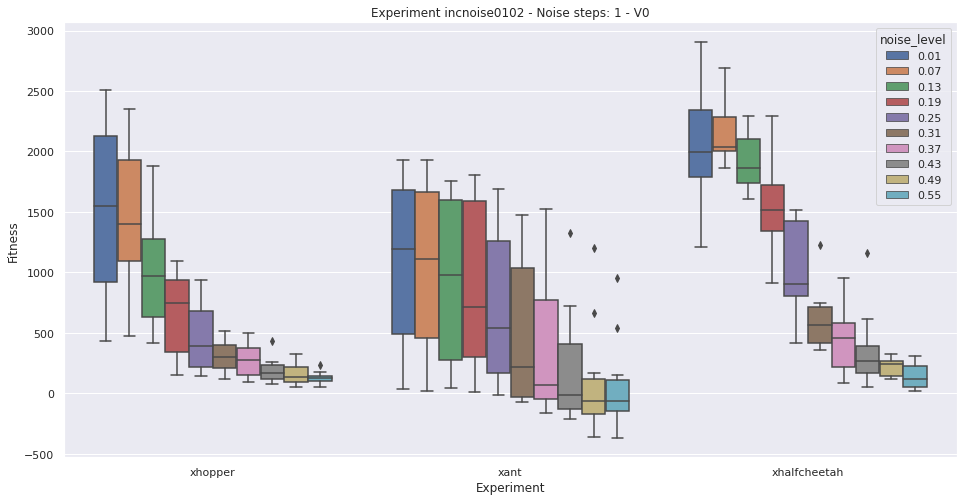

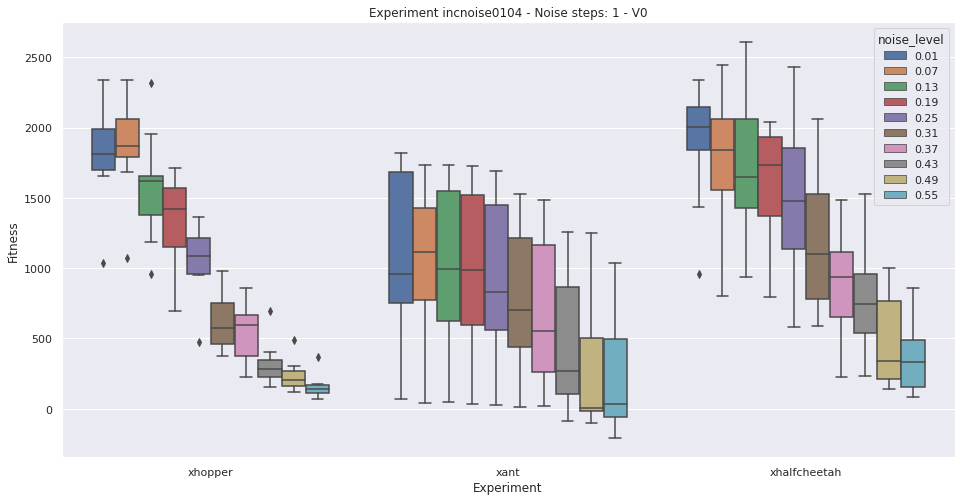

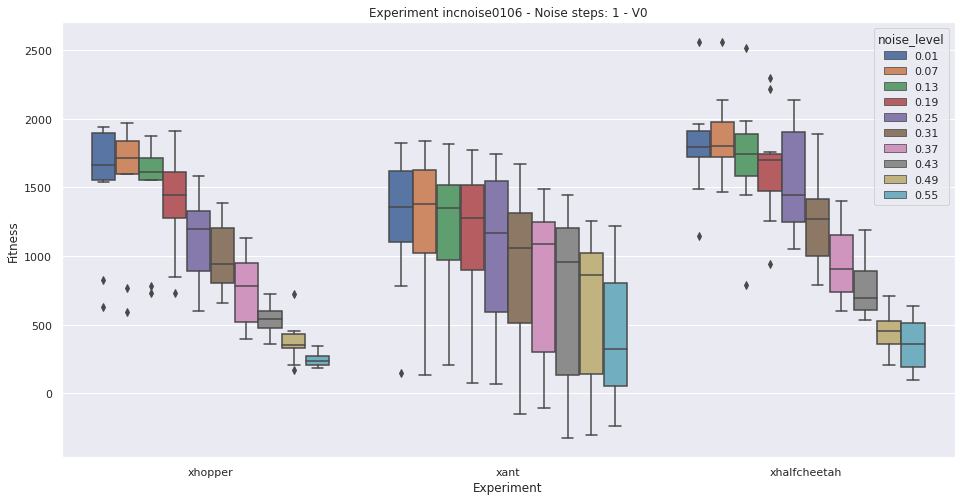

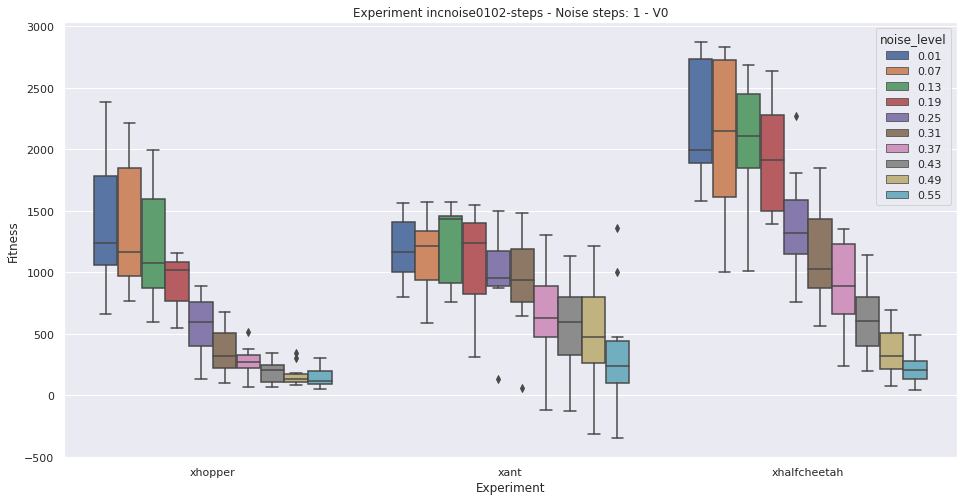

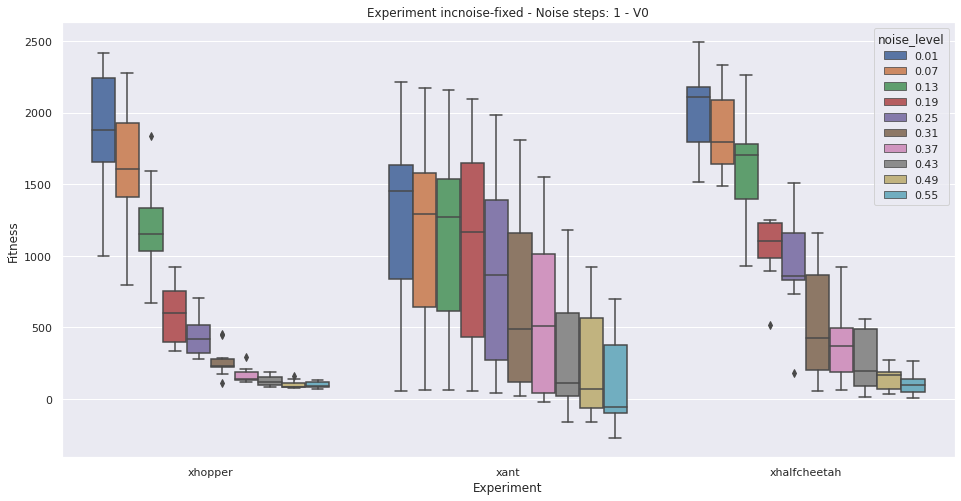

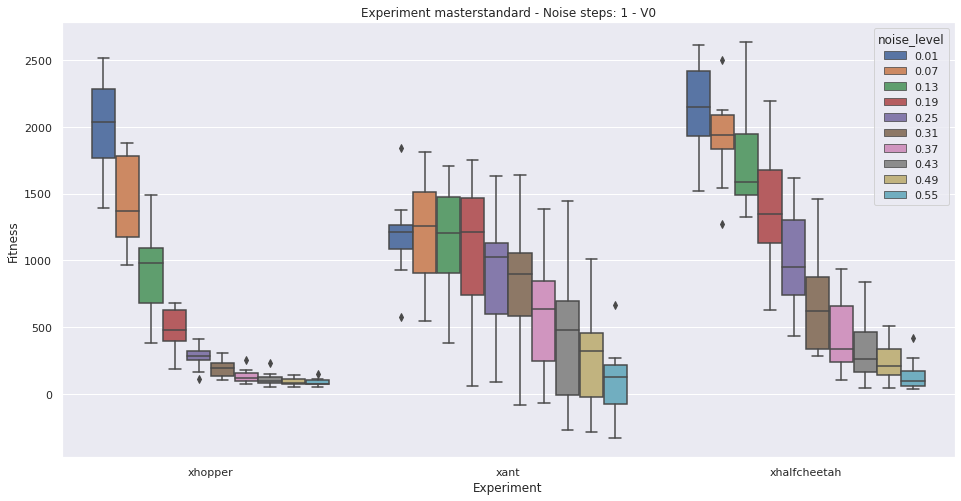

<Figure size 1152x576 with 0 Axes>

In [9]:
for exp in exp_list:
    steps = 1
    ax = sns.boxplot(
        data=data_plot.query(
            f' \
            Experiment == "{exp}" and  \
            Task.isin(@tasks_v5) and  \
            noise_steps == {steps} and  \
            noise_level in (0.01,0.07,0.13,0.19,0.25,0.31,0.37,0.43,0.49,0.55)'
        ,engine="python"),
        x='Task',
        y='Reward',
        hue='noise_level')
    _ = ax.set(xlabel='Experiment',
           ylabel='Fitness',
           title=f'Experiment {exp} - Noise steps: {steps} - V0')
    plt.figure()

## Experiment vs Noise Level - Uncorrelated - V5

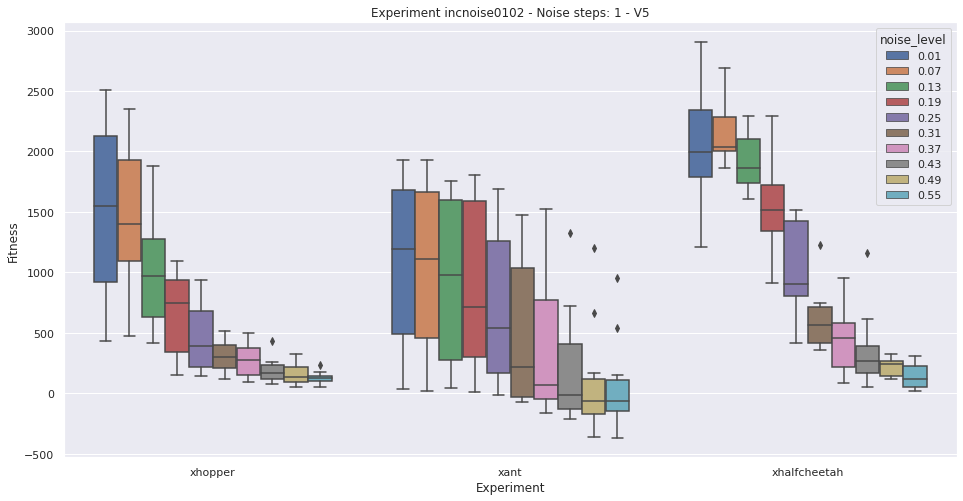

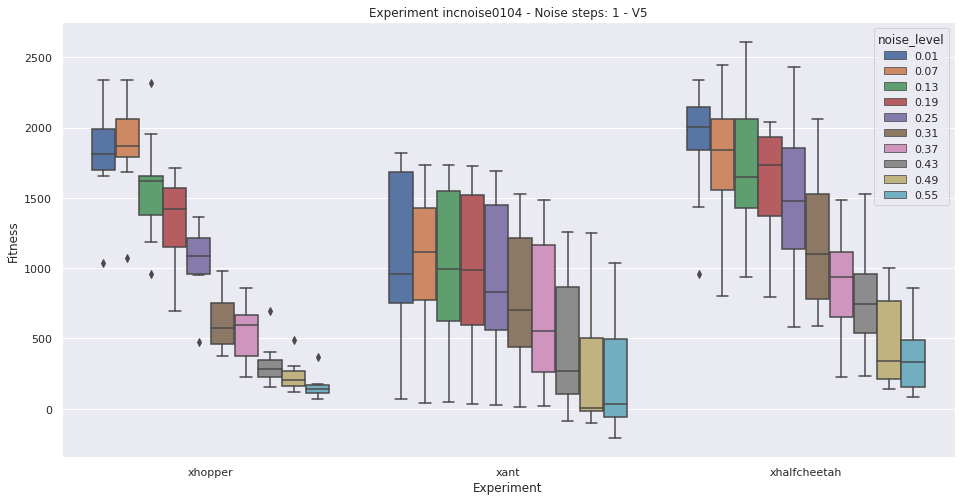

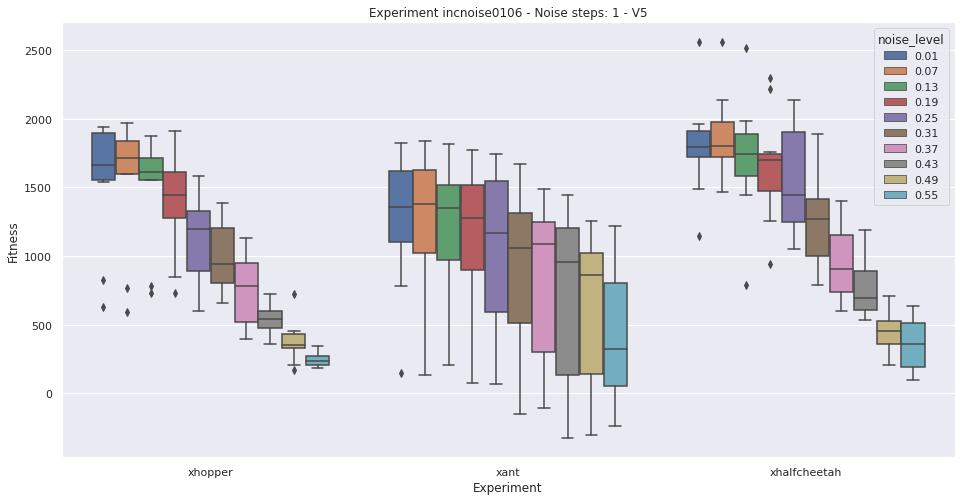

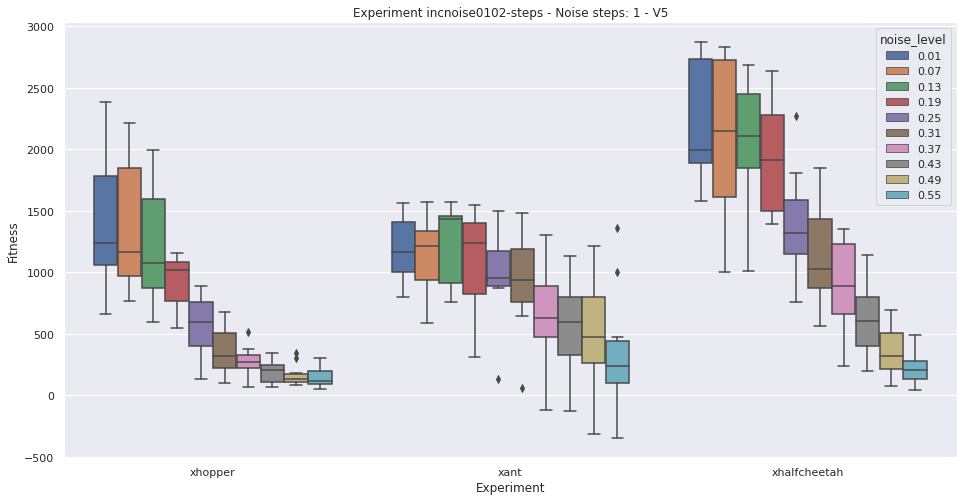

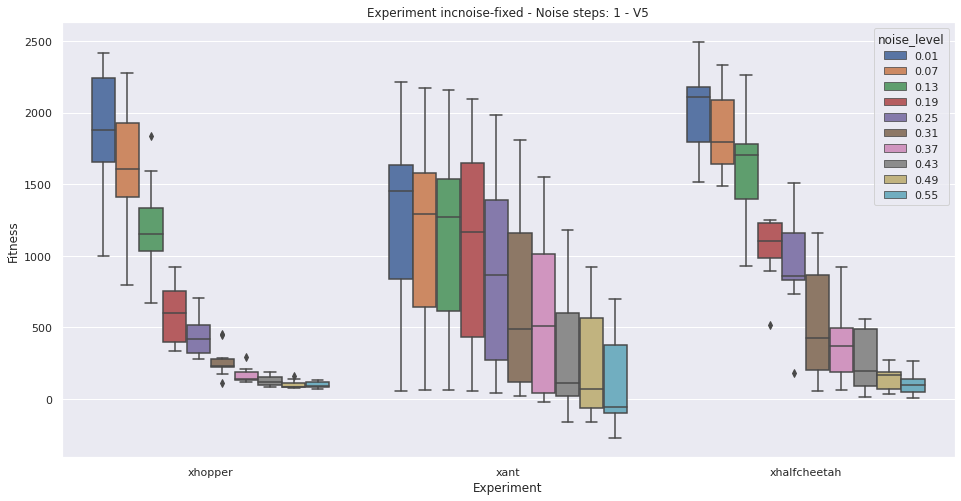

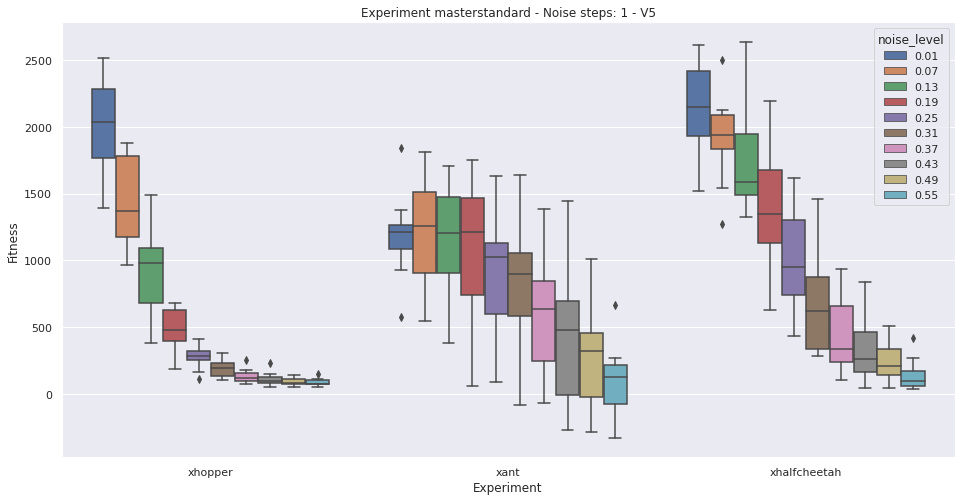

<Figure size 1152x576 with 0 Axes>

In [10]:
for exp in exp_list:
    steps = 1
    ax = sns.boxplot(
        data=data_plot.query(
            f' \
            Experiment == "{exp}" and  \
            Task.isin(@tasks_v5) and  \
            noise_steps == {steps} and  \
            noise_level in (0.01,0.07,0.13,0.19,0.25,0.31,0.37,0.43,0.49,0.55)'
        ,engine="python"),
        x='Task',
        y='Reward',
        hue='noise_level')
    _ = ax.set(xlabel='Experiment',
           ylabel='Fitness',
           title=f'Experiment {exp} - Noise steps: {steps} - V5')
    plt.figure()

## Experiment vs Noise Steps 

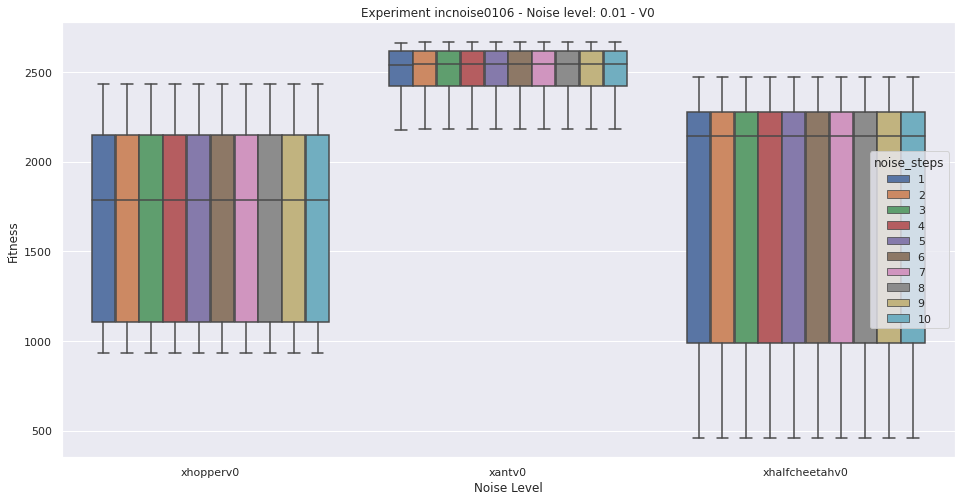

In [11]:
exp = E0106
noise_level = 0.01
ax = sns.boxplot(
    data=data_plot.query(
        f' \
        Experiment == "{exp}" and  \
        Task.isin(@tasks_v0) and  \
        noise_level == {noise_level} and  \
        noise_steps in (1,2,3,4,5,6,7,8,9,10)'
    ,engine="python"),
    x='Task',
    y='Reward',
    hue='noise_steps')
_ = ax.set(xlabel='Noise Level',
       ylabel='Fitness',
       title=f'Experiment {exp} - Noise level: {noise_level} - V0')

## Task vs NoiseSteps

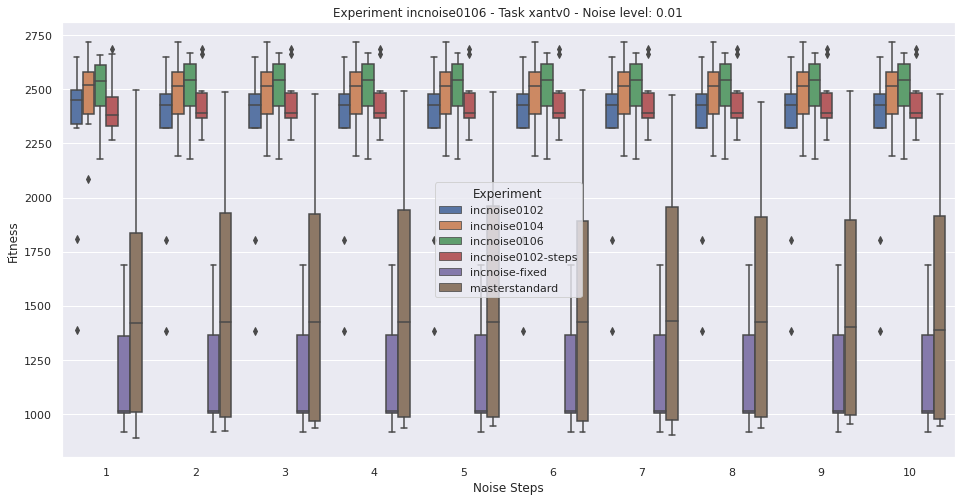

In [12]:
exp = E0106
task = TANT
noise_level = 0.01
ax = sns.boxplot(
    data=data_plot.query(
        f' \
        Experiment.isin(@exp_list) and  \
        (Task == "{task}") and  \
        noise_level == {noise_level} and  \
        noise_steps in (1,2,3,4,5,6,7,8,9,10)'
    ,engine="python"),
    x='noise_steps',
    y='Reward',
    hue='Experiment')
_ = ax.set(xlabel='Noise Steps',
       ylabel='Fitness',
       title=f'Experiment {exp} - Task {task} - Noise level: {noise_level}')